GPT-4o-mini feature config results

In [109]:
import pandas as pd
from pathlib import Path

base_dir = Path("experiment_results/aggregates")
all_files = list(base_dir.rglob("*_agg.csv"))

dfs = []
for f in all_files:
    df = pd.read_csv(f)
    df["model"] = f.parts[-3]  # e.g., 'gpt-4o-mini'
    df["dataset"] = f.parts[-2]  # e.g., 'health'
    dfs.append(df)

results_df = pd.concat(dfs, ignore_index=True)

In [110]:
results_df

,dataset,size,model,features,error_level,mean_accuracy,mean_f1,std_f1,mean_latency,mean_tokens,runs_count
0,health,Large,mistral-medium-2505-ruud,NoFeatures,0.10,0.995767,0.663729,0.003466,24.696827,2403.0,5
1,retail,Large,mistral-medium-2505-ruud,NoFeatures,0.10,0.800003,0.109044,0.030085,26.660095,2427.2,5
2,sensor,Large,mistral-medium-2505-ruud,NoFeatures,0.10,0.489229,0.024689,0.002665,36.396635,3498.0,5
3,wallmart,Large,mistral-medium-2505-ruud,NoFeatures,0.10,0.965674,0.028381,0.063462,25.746788,2374.6,5
4,health,Large,gpt-4o-mini,NoFeatures,0.10,0.995874,0.667893,0.005213,22.792752,1714.0,5
...,...,...,...,...,...,...,...,...,...,...,...
152,sensor,Medium,baseline,NoGenAI,0.10,0.703278,0.593014,0.032418,2.693785,0.0,5
153,wallmart,Large,baseline,NoGenAI,0.01,0.800971,0.203907,0.019374,8.864542,0.0,5
154,wallmart,Large,baseline,NoGenAI,0.10,0.802997,0.690693,0.030919,12.428199,0.0,5
155,wallmart,Medium,baseline,NoGenAI,0.01,0.800663,0.202427,0.020795,0.661477,0.0,5


In [111]:
results_df["features"] = results_df["features"].astype("category")
results_df["size"] = results_df["size"].astype("category")
results_df["error_level"] = results_df["error_level"].astype(float)
results_df["mean_f1"] = results_df["mean_f1"].astype(float)

In [112]:
results_df.groupby(
    ["model", "dataset", "features", "size", "error_level"], observed=True
)[["mean_f1", "std_f1", "mean_accuracy", "mean_latency"]].mean()


mean_f1  \
model                    dataset  features   size   error_level             
baseline                 health   NoGenAI    Large  0.01         0.981782   
                                                    0.10         0.959288   
                                             Medium 0.01         0.981093   
                                                    0.10         0.961228   
                         retail   NoGenAI    Large  0.01         0.620174   
...                                                                   ...   
mistral-medium-2505-ruud sensor   NoFeatures Large  0.10         0.024689   
                         wallmart NoFeatures Large  0.01         0.202544   
                                                    0.10         0.359364   
                                             Medium 0.01         0.198223   
                                                    0.10         0.684417   

                                                                   std_f1  \
model                    dataset  features   size   error_level             
baseline                 health   NoGenAI    Large  0.01         0.002379   
                                                    0.10         0.009097   
                                             Medium 0.01         0.002252   
                                                    0.10         0.008103   
                         retail   NoGenAI    Large  0.01         0.035944   
...                                                                   ...   
mistral-medium-2505-ruud sensor   NoFeatures Large  0.10         0.002665   
                         wallmart NoFeatures Large  0.01         0.020623   
                                                    0.10         0.047454   
                                             Medium 0.01         0.027397   
                                                    0.10         0.030790   

                                                                 mean_accuracy  \
model                    dataset  features   size   error_level                  
baseline                 health   NoGenAI    Large  0.01              0.999063   
                                                    0.10              0.981893   
                                             Medium 0.01              0.999010   
                                                    0.10              0.982679   
                         retail   NoGenAI    Large  0.01              0.968218   
...                                                                        ...   
mistral-medium-2505-ruud sensor   NoFeatures Large  0.10              0.489229   
                         wallmart NoFeatures Large  0.01              0.800523   
                                                    0.10              0.884132   
                                             Medium 0.01              0.800736   
                                                    0.10              0.800528   

                                                                 mean_latency  
model                    dataset  features   size   error_level                
baseline                 health   NoGenAI    Large  0.01             8.364093  
                                                    0.10            13.108390  
                                             Medium 0.01             1.557147  
                                                    0.10             1.359027  
                         retail   NoGenAI    Large  0.01             6.082942  
...                                                                       ...  
mistral-medium-2505-ruud sensor   NoFeatures Large  0.10            36.396635  
                         wallmart NoFeatures Large  0.01            24.908238  
                                                    0.10            24.725839  
                                             Medium 0.01            34.763563  
                                   

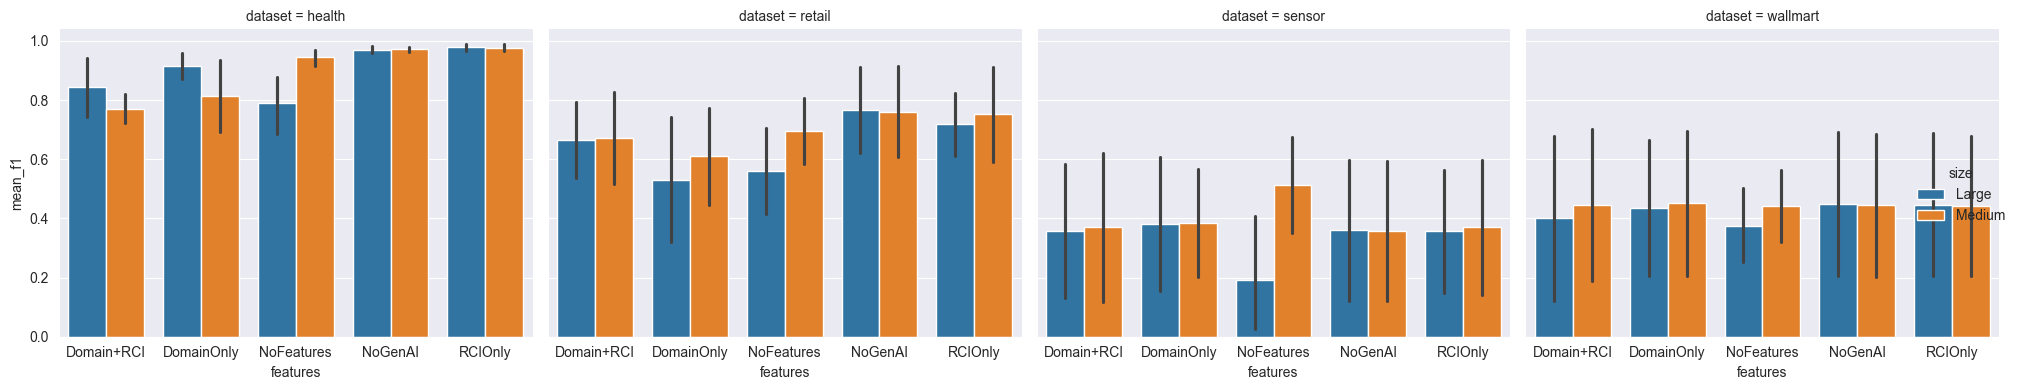

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# F1 by features for each dataset
sns.catplot(
    data=results_df,
    kind="bar",
    x="features",
    y="mean_f1",
    hue="size",
    col="dataset",
    height=4,
    aspect=1.2
)
plt.tight_layout()
plt.show()

<Axes: xlabel='dataset-size', ylabel='features'>

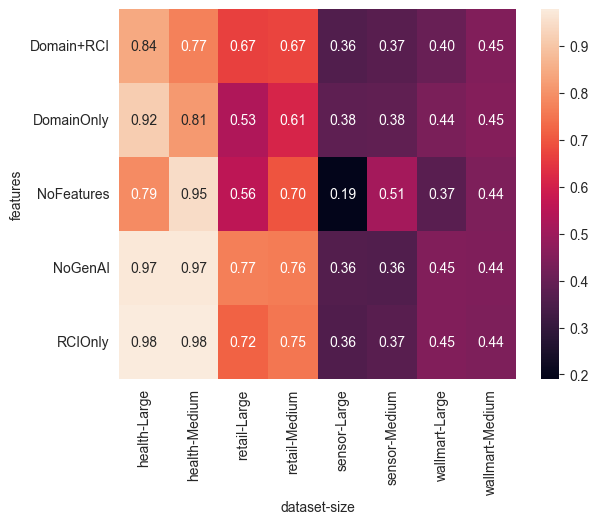

In [114]:
pivot = results_df.pivot_table(
    index="features",
    columns=["dataset", "size"],
    values="mean_f1",
    observed=True
)

sns.heatmap(pivot, annot=True, fmt=".2f")

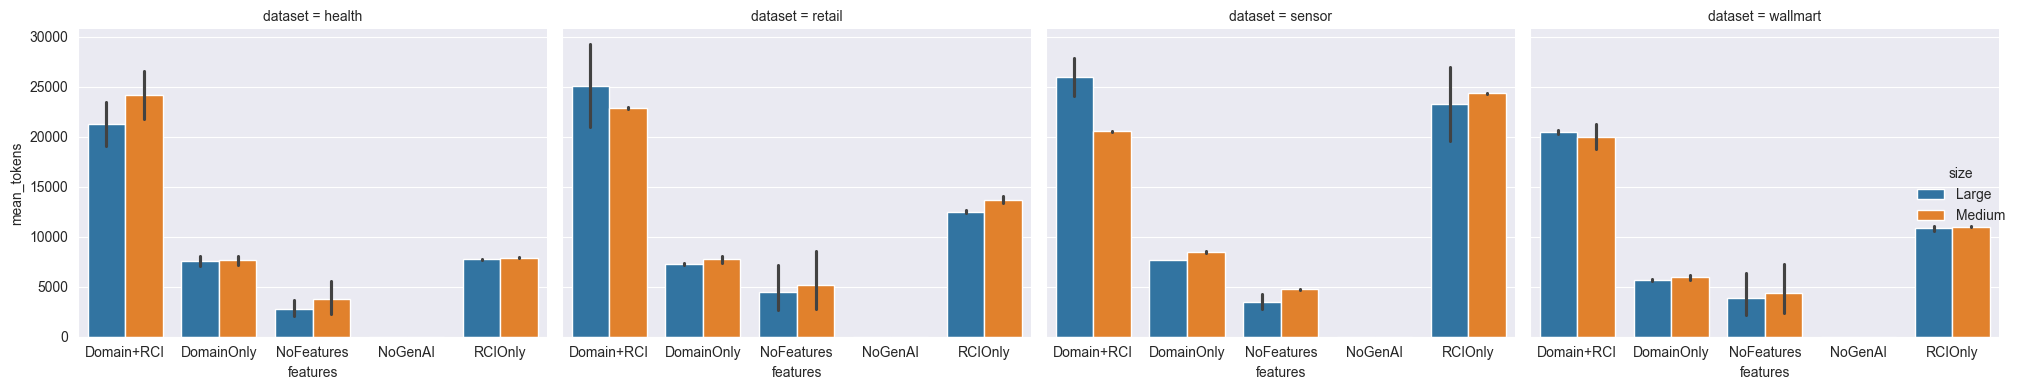

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# F1 by features for each dataset
sns.catplot(
    data=results_df,
    kind="bar",
    x="features",
    y="mean_tokens",
    hue="size",
    col="dataset",
    height=4,
    aspect=1.2
)
plt.tight_layout()
plt.show()

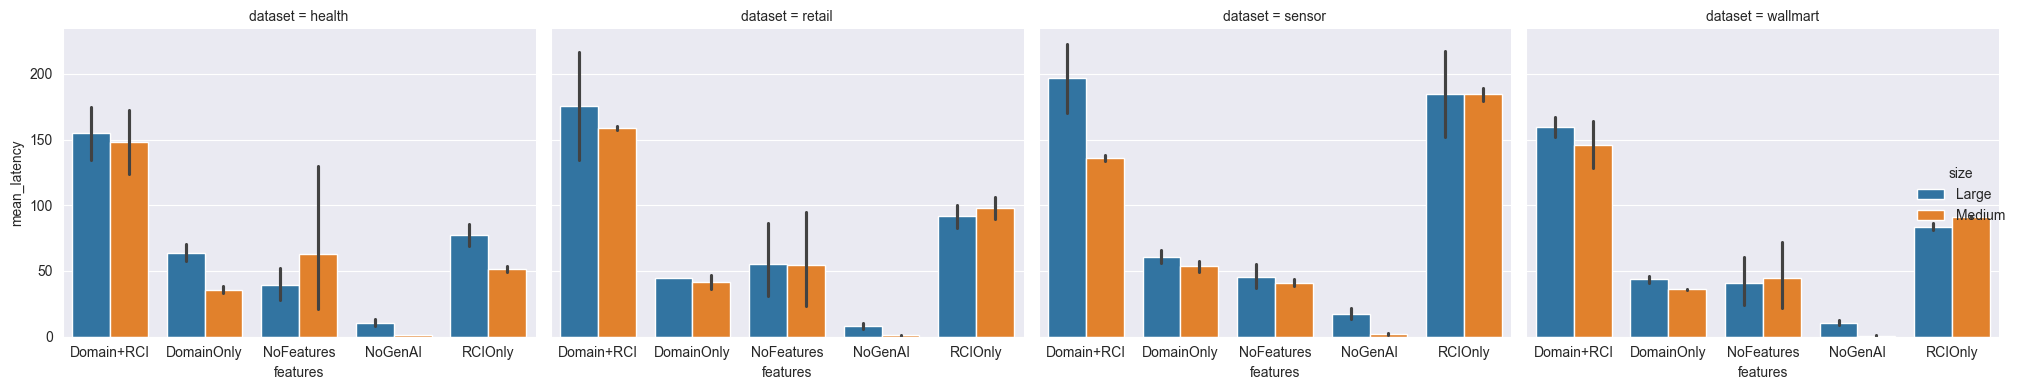

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# F1 by features for each dataset
sns.catplot(
    data=results_df,
    kind="bar",
    x="features",
    y="mean_latency",
    hue="size",
    col="dataset",
    height=4,
    aspect=1.2
)
plt.tight_layout()
plt.show()

In [117]:
# Summarize the best config (highest F1) per dataset and size, with explicit 'observed' flag

best_configs = (
    results_df.loc[
        results_df.groupby(['dataset', 'size', 'error_level'], observed=True)['mean_f1'].idxmax()
    ]
    .sort_values(['dataset', 'size', 'error_level'])
    .reset_index(drop=True)
)

display(best_configs[['dataset', 'size', 'features', 'error_level', 'mean_f1', 'mean_accuracy', 'mean_latency']])


,dataset,size,features,error_level,mean_f1,mean_accuracy,mean_latency
0,health,Large,RCIOnly,0.01,0.989827,0.999478,69.309137
1,health,Large,RCIOnly,0.10,0.966897,0.985192,86.056838
2,health,Medium,NoFeatures,0.01,0.989236,0.999449,13.060668
3,health,Medium,NoFeatures,0.10,0.967673,0.985498,10.064366
4,retail,Large,NoGenAI,0.01,0.620174,0.968218,6.082942
5,retail,Large,NoFeatures,0.10,0.913005,0.959167,25.985199
6,retail,Medium,NoFeatures,0.01,0.613070,0.967923,26.796247
7,retail,Medium,NoGenAI,0.10,0.914375,0.959358,0.899110
8,sensor,Large,NoFeatures,0.01,0.359530,0.940907,45.369209
9,sensor,Large,NoFeatures,0.10,0.679570,0.869846,62.900635


In [118]:
# Summarize the best config (lowest token usage) per dataset, size, and error_level, with explicit 'observed' flag

lowest_tokens_configs = (
    results_df.loc[
        results_df.groupby(['dataset', 'size', 'error_level'], observed=True)['mean_tokens'].idxmin()
    ]
    .sort_values(['dataset', 'size', 'error_level'])
    .reset_index(drop=True)
)

display(lowest_tokens_configs[['dataset', 'size', 'features', 'error_level', 'mean_tokens', 'mean_f1', 'mean_accuracy', 'mean_latency']])


,dataset,size,features,error_level,mean_tokens,mean_f1,mean_accuracy,mean_latency
0,health,Large,NoGenAI,0.01,0.0,0.981782,0.999063,8.364093
1,health,Large,NoGenAI,0.10,0.0,0.959288,0.981893,13.108390
2,health,Medium,NoGenAI,0.01,0.0,0.981093,0.999010,1.557147
3,health,Medium,NoGenAI,0.10,0.0,0.961228,0.982679,1.359027
4,retail,Large,NoGenAI,0.01,0.0,0.620174,0.968218,6.082942
5,retail,Large,NoGenAI,0.10,0.0,0.912842,0.959158,10.526802
6,retail,Medium,NoGenAI,0.01,0.0,0.607104,0.967847,1.131625
7,retail,Medium,NoGenAI,0.10,0.0,0.914375,0.959358,0.899110
8,sensor,Large,NoGenAI,0.01,0.0,0.121818,0.630401,13.487157
9,sensor,Large,NoGenAI,0.10,0.0,0.598541,0.705568,21.618079


No feature model comparison

In [119]:
from pathlib import WindowsPath


rm_files = [
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Medium_RCIOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Large_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Large_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Large_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Medium_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Medium_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Large_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Medium_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Large_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Medium_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Medium_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/health/gpt-4o-mini_health_Large_RCIOnly_err0.01_agg.csv'),

    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Medium_RCIOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Large_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Large_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Large_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Medium_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Medium_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Large_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Medium_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Large_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Medium_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Medium_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/retail/gpt-4o-mini_retail_Large_RCIOnly_err0.01_agg.csv'),

    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Medium_RCIOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Large_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Large_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Large_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Medium_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Medium_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Large_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Medium_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Large_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Medium_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Medium_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/sensor/gpt-4o-mini_sensor_Large_RCIOnly_err0.01_agg.csv'),

    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Medium_RCIOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Large_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Large_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Large_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Medium_DomainOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Medium_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Large_Domain+RCI_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Medium_Domain+RCI_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Large_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Medium_DomainOnly_err0.01_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Medium_RCIOnly_err0.1_agg.csv'),
    WindowsPath('experiment_results/aggregates/gpt-4o-mini/wallmart/gpt-4o-mini_wallmart_Large_RCIOnly_err0.01_agg.csv')
]


In [120]:
import pandas as pd
from pathlib import Path
import re

base_dir = Path("experiment_results/aggregates")
all_files = list(base_dir.rglob("*_agg.csv"))
for file in rm_files:
    all_files.remove(file)

dfs = []
for f in all_files:
    # Example: experiment_results/aggregates/deepseek-chat/health/deepseek-chat_health_Large_NoFeatures_err0.1_agg.csv
    match = re.match(r'([^_]+)_([^_]+)_([^_]+)_([^_]+)_err([0-9.]+)_agg\.csv', f.name)
    if match:
        model, dataset, size, features, error_level = match.groups()
        df = pd.read_csv(f)
        df['model'] = model
        df['dataset'] = dataset
        df['size'] = size
        df['features'] = features
        df['error_level'] = float(error_level)
        dfs.append(df)
    else:
        print(f"Filename not matched: {f}")

results_df = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(results_df)} rows from {len(all_files)} files.")
display(results_df.head())

# Show a simple summary by model and dataset
summary = results_df.groupby(['model', 'dataset', 'size', 'error_level']).agg(
    mean_f1=('mean_f1', 'mean'),
    mean_accuracy=('mean_accuracy', 'mean'),
    mean_cost=('mean_tokens', 'mean')
).reset_index()
display(summary)


Loaded 109 rows from 109 files.


,dataset,size,model,features,error_level,mean_accuracy,mean_f1,std_f1,mean_latency,mean_tokens,runs_count
0,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.995767,0.663729,0.003466,24.696827,2403.0,5
1,retail,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.800003,0.109044,0.030085,26.660095,2427.2,5
2,sensor,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.489229,0.024689,0.002665,36.396635,3498.0,5
3,wallmart,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.965674,0.028381,0.063462,25.746788,2374.6,5
4,health,Large,gpt-4o-mini,NoFeatures,0.1,0.995874,0.667893,0.005213,22.792752,1714.0,5


,model,dataset,size,error_level,mean_f1,mean_accuracy,mean_cost
0,baseline,health,Large,0.01,0.981782,0.999063,0.0
1,baseline,health,Large,0.10,0.959288,0.981893,0.0
2,baseline,health,Medium,0.01,0.981093,0.999010,0.0
3,baseline,health,Medium,0.10,0.961228,0.982679,0.0
4,baseline,retail,Large,0.01,0.620174,0.968218,0.0
...,...,...,...,...,...,...,...
91,mistral-medium-2505-ruud,sensor,Large,0.10,0.024689,0.489229,3498.0
92,mistral-medium-2505-ruud,wallmart,Large,0.01,0.202544,0.800523,2346.6
93,mistral-medium-2505-ruud,wallmart,Large,0.10,0.359364,0.884132,2387.4
94,mistral-medium-2505-ruud,wallmart,Medium,0.01,0.198223,0.800736,2699.4


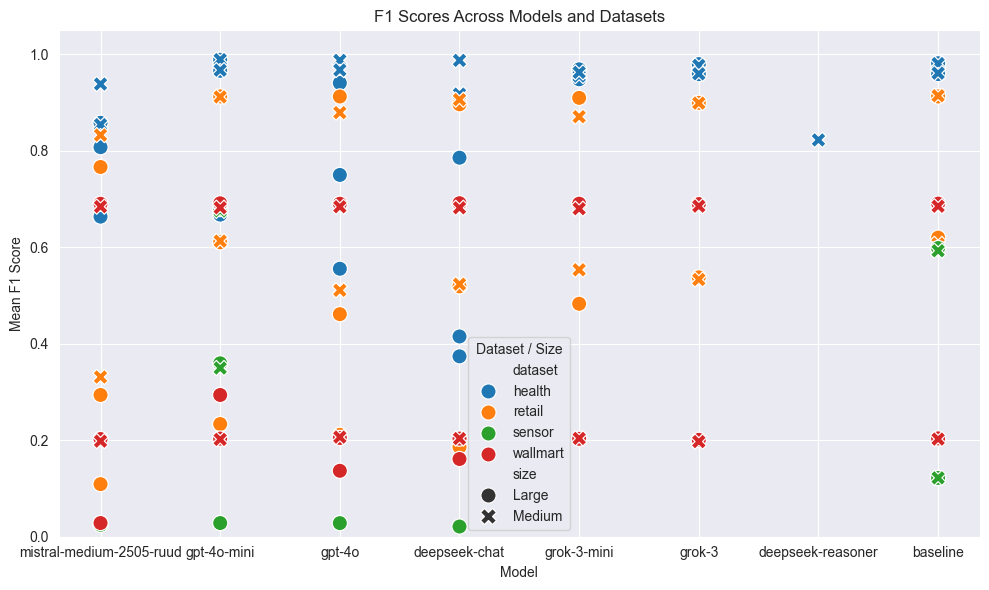

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot F1 by model, colored by dataset, grouped by size, error_level as marker shape
sns.scatterplot(
    data=results_df,
    x="model",
    y="mean_f1",
    hue="dataset",
    style="size",
    s=120,
    palette="tab10"
)

plt.title("F1 Scores Across Models and Datasets")
plt.ylabel("Mean F1 Score")
plt.xlabel("Model")
plt.ylim(0, 1.05)
plt.legend(title="Dataset / Size")
plt.tight_layout()
plt.show()


In [122]:
# Average F1 score per model and per dataset
avg_f1_per_model_dataset = (
    results_df.groupby(["model", "dataset"])["mean_f1"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"mean_f1": "avg_f1"})
)

display(avg_f1_per_model_dataset)


,model,dataset,avg_f1
0,baseline,health,0.970848
1,grok-3,health,0.969058
2,grok-3-mini,health,0.958921
3,gpt-4o-mini,health,0.915920
4,gpt-4o,health,0.840393
5,mistral-medium-2505-ruud,health,0.824556
6,deepseek-reasoner,health,0.822755
7,baseline,retail,0.763623
8,grok-3,retail,0.717508
9,grok-3-mini,retail,0.704349


In [123]:
# Compute the average F1 score for each model
avg_f1_per_model = (
    results_df.groupby("model")["mean_f1"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"mean_f1": "avg_f1"})
)

display(avg_f1_per_model)


,model,avg_f1
0,deepseek-reasoner,0.822755
1,grok-3,0.709971
2,grok-3-mini,0.702564
3,baseline,0.634724
4,gpt-4o-mini,0.601362
5,gpt-4o,0.570554
6,deepseek-chat,0.529715
7,mistral-medium-2505-ruud,0.517816


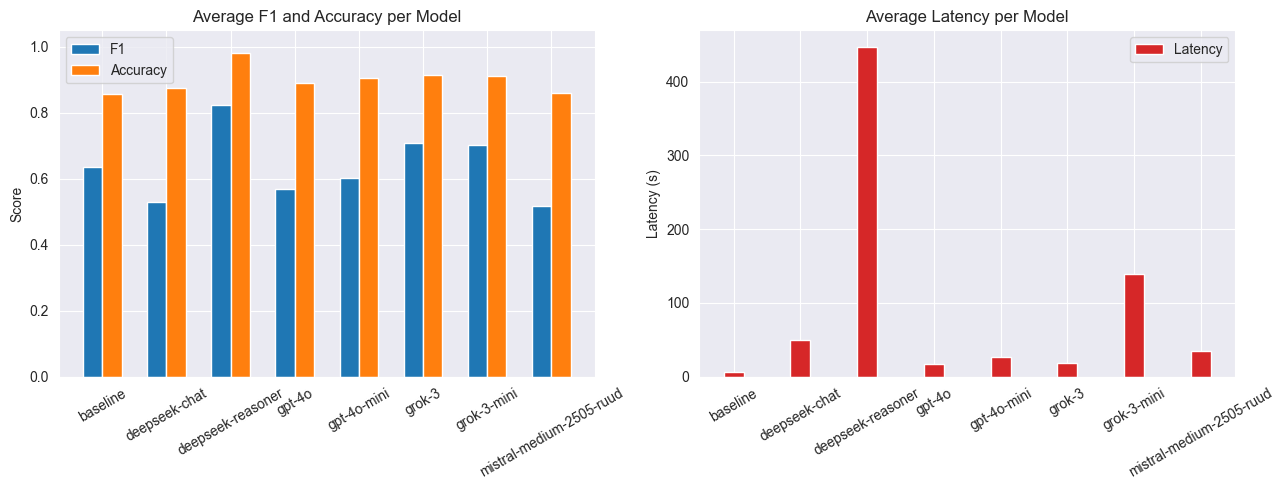

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Compute averages per model
summary = (
    results_df.groupby("model")[["mean_f1", "mean_accuracy", "mean_latency"]]
    .mean()
    .reset_index()
)
models = summary['model']
x = np.arange(len(models))
width = 0.3

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# --- F1 and Accuracy ---
axes[0].bar(x - width/2, summary['mean_f1'], width=width, label='F1', color='tab:blue')
axes[0].bar(x + width/2, summary['mean_accuracy'], width=width, label='Accuracy', color='tab:orange')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1.05)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=30)
axes[0].set_title('Average F1 and Accuracy per Model')
axes[0].legend()

# --- Latency ---
axes[1].bar(x, summary['mean_latency'], width=width, color='tab:red', label='Latency')
axes[1].set_ylabel('Latency (s)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=30)
axes[1].set_title('Average Latency per Model')
axes[1].legend()

plt.tight_layout()
plt.show()


baseline

In [125]:
import pandas as pd
from pathlib import Path
import re

base_dir = Path("experiment_results/aggregates")
all_files = list(base_dir.rglob("*_agg.csv"))

dfs = []
for f in all_files:
    # Example: experiment_results/aggregates/baseline/health/baseline_health_Large_NoFeatures_err0.1_agg.csv
    match = re.match(r'([^_]+)_([^_]+)_([^_]+)_([^_]+)_err([0-9.]+)_agg\.csv', f.name)
    if match:
        model, dataset, size, features, error_level = match.groups()
        df = pd.read_csv(f)
        df['model'] = model
        df['dataset'] = dataset
        df['size'] = size
        df['features'] = features
        df['error_level'] = float(error_level)
        dfs.append(df)
    else:
        print(f"Filename not matched: {f}")

results_df = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(results_df)} rows from {len(all_files)} files.")
display(results_df.head())


Loaded 157 rows from 157 files.


,dataset,size,model,features,error_level,mean_accuracy,mean_f1,std_f1,mean_latency,mean_tokens,runs_count
0,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.995767,0.663729,0.003466,24.696827,2403.0,5
1,retail,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.800003,0.109044,0.030085,26.660095,2427.2,5
2,sensor,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.489229,0.024689,0.002665,36.396635,3498.0,5
3,wallmart,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.965674,0.028381,0.063462,25.746788,2374.6,5
4,health,Large,gpt-4o-mini,NoFeatures,0.1,0.995874,0.667893,0.005213,22.792752,1714.0,5


In [126]:
summary = (
    results_df.groupby("model")[["mean_f1", "mean_accuracy", "mean_latency"]]
    .mean()
    .reset_index()
)
display(summary)


,model,mean_f1,mean_accuracy,mean_latency
0,baseline,0.634724,0.855796,6.571226
1,deepseek-chat,0.529715,0.874145,49.994632
2,deepseek-reasoner,0.822755,0.980610,447.085138
3,gpt-4o,0.570554,0.890686,17.176864
4,gpt-4o-mini,0.591321,0.864605,81.894718
5,grok-3,0.709971,0.914668,19.012141
6,grok-3-mini,0.702564,0.911574,139.593961
7,mistral-medium-2505-ruud,0.517816,0.859286,34.715169


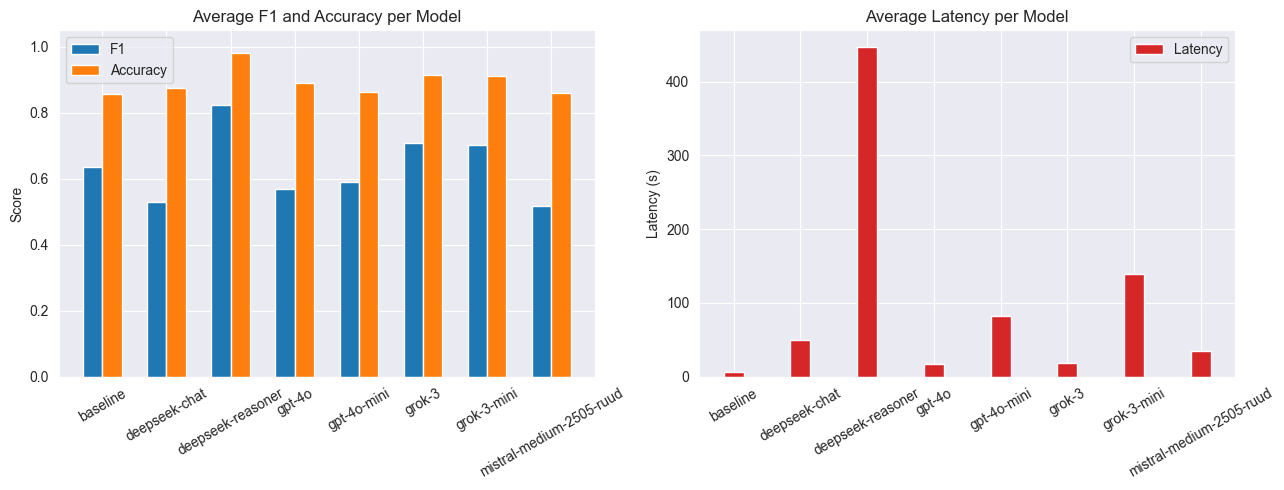

In [127]:
import matplotlib.pyplot as plt
import numpy as np

models = summary['model']
x = np.arange(len(models))
width = 0.3

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].bar(x - width/2, summary['mean_f1'], width=width, label='F1', color='tab:blue')
axes[0].bar(x + width/2, summary['mean_accuracy'], width=width, label='Accuracy', color='tab:orange')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1.05)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=30)
axes[0].set_title('Average F1 and Accuracy per Model')
axes[0].legend()
axes[1].bar(x, summary['mean_latency'], width=width, color='tab:red', label='Latency')
axes[1].set_ylabel('Latency (s)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=30)
axes[1].set_title('Average Latency per Model')
axes[1].legend()
plt.tight_layout()
plt.show()


Outlier only

In [128]:
import pandas as pd
from pathlib import Path
import re

base_dir = Path("experiment_results/aggregates/outlier_only")
all_files = list(base_dir.rglob("*_agg.csv"))

dfs = []
for f in all_files:
    # Example: experiment_results/aggregates/baseline/health/baseline_health_Large_NoFeatures_err0.1_agg.csv
    match = re.match(r'([^_]+)_([^_]+)_([^_]+)_([^_]+)_err([0-9.]+)_agg\.csv', f.name)
    if match:
        model, dataset, size, features, error_level = match.groups()
        df = pd.read_csv(f)
        df['model'] = model
        df['dataset'] = dataset
        df['size'] = size
        df['features'] = features
        df['error_level'] = float(error_level)
        dfs.append(df)
    else:
        print(f"Filename not matched: {f}")

results_df = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(results_df)} rows from {len(all_files)} files.")
display(results_df.head())


Loaded 16 rows from 16 files.


,dataset,size,model,features,error_level,mean_accuracy,mean_f1,std_f1,mean_latency,mean_tokens,runs_count
0,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.995767,0.663729,0.003466,24.696827,2403.0,5
1,retail,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.800003,0.109044,0.030085,26.660095,2427.2,5
2,sensor,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.489229,0.024689,0.002665,36.396635,3498.0,5
3,wallmart,Large,mistral-medium-2505-ruud,NoFeatures,0.1,0.965674,0.028381,0.063462,25.746788,2374.6,5
4,health,Large,gpt-4o-mini,NoFeatures,0.1,0.995874,0.667893,0.005213,22.792752,1714.0,5


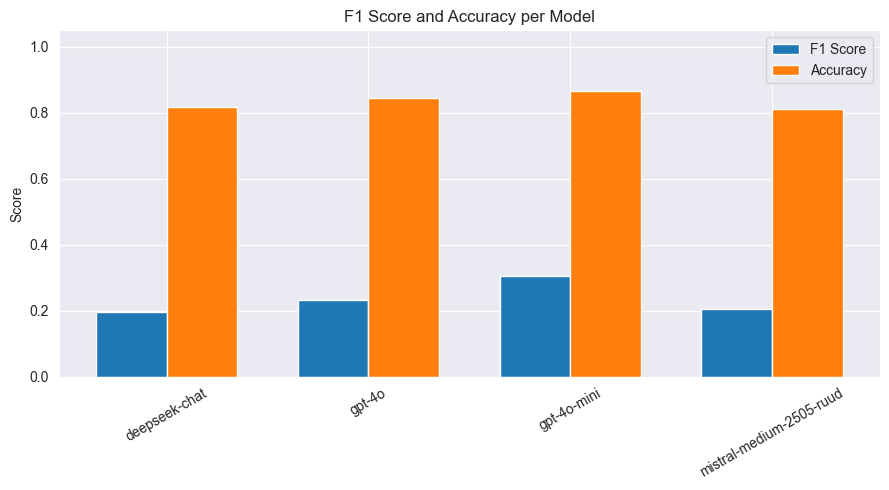

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Group by model, get average F1 and accuracy (if not already done)
summary = (
    results_df.groupby("model")[["mean_f1", "mean_accuracy"]]
    .mean()
    .reset_index()
)
models = summary['model']
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))

# Grouped bars: left (F1), right (Accuracy)
ax.bar(x - width/2, summary['mean_f1'], width=width, color='tab:blue', label='F1 Score')
ax.bar(x + width/2, summary['mean_accuracy'], width=width, color='tab:orange', label='Accuracy')

ax.set_ylabel('Score')
ax.set_title('F1 Score and Accuracy per Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30)
ax.set_ylim(0, 1.05)
ax.legend()

plt.tight_layout()
plt.show()


Accuracy, F1, precision and recall

In [130]:
import pandas as pd
from pathlib import Path
import re

run_base_dir = Path("experiment_results/runs")
all_run_files = list(run_base_dir.rglob("*_runs.csv"))

dfs = []
for f in all_run_files:
    # Example: gpt-4o-mini_health_Large_Domain+RCI_err0.1_runs.csv
    match = re.match(r'([^_]+)_([^_]+)_([^_]+)_([^_]+)_err([0-9.]+)_runs\.csv', f.name)
    if match:
        model, dataset, size, features, error_level = match.groups()
        df = pd.read_csv(f)
        df['model'] = model
        df['dataset'] = dataset
        df['size'] = size
        df['features'] = features
        df['error_level'] = float(error_level)
        dfs.append(df)
    else:
        print(f"Filename not matched: {f}")

runs_df = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(runs_df)} rows from {len(all_run_files)} files.")
display(runs_df.head())


Loaded 785 rows from 157 files.


,dataset,size,model,features,error_level,run_index,accuracy,f1,precision,recall,runtime_seconds,tokens_total,tokens_prompt,tokens_completion,cost_usd
0,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,1,0.995821,0.665555,0.980354,0.503786,25.834979,2594,1855,739,0.002220
1,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,2,0.995767,0.667865,0.980326,0.506445,22.434836,2490,1856,634,0.002010
2,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,3,0.995783,0.664975,0.980794,0.503005,20.924813,1760,1226,534,0.001558
3,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,4,0.995735,0.660305,0.979567,0.497997,26.606152,2585,1870,715,0.002178
4,health,Large,mistral-medium-2505-ruud,NoFeatures,0.1,5,0.995728,0.659944,0.980292,0.497400,27.683353,2586,1856,730,0.002202


In [131]:
# For all models/datasets
print(runs_df[['accuracy', 'f1', 'precision', 'recall']].describe())

# By model (grouped)
grouped_stats = runs_df.groupby('model')[['accuracy', 'f1', 'precision', 'recall']].agg(['mean', 'std', 'min', 'max'])
display(grouped_stats)


         accuracy          f1   precision      recall
count  785.000000  785.000000  785.000000  785.000000
mean     0.874950    0.598904    0.530515    0.895316
std      0.122195    0.314756    0.340856    0.170219
min      0.258296    0.000000    0.000000    0.000000
25%      0.800925    0.246581    0.148790    0.925526
50%      0.922732    0.660305    0.524493    0.960618
75%      0.975185    0.911529    0.878880    0.981405
max      0.999528    0.991748    1.000000    1.000000


accuracy                                      f1  \
                              mean       std       min       max      mean   
model                                                                        
baseline                  0.855796  0.132991  0.628079  0.999094  0.634724   
deepseek-chat             0.874145  0.123139  0.504064  0.999425  0.529715   
deepseek-reasoner         0.980610  0.035622  0.917104  0.999375  0.822755   
gpt-4o                    0.890686  0.128584  0.478533  0.999521  0.570554   
gpt-4o-mini               0.864605  0.125317  0.316951  0.999504  0.591321   
grok-3                    0.914668  0.082754  0.789400  0.999004  0.709971   
grok-3-mini               0.911574  0.083056  0.789400  0.999528  0.702564   
mistral-medium-2505-ruud  0.859286  0.129704  0.258296  0.999403  0.517816   

                                                       precision            \
                               std       min       max      mean       std   
model                                                                        
baseline                  0.310434  0.103472  0.984828  0.553607  0.340523   
deepseek-chat             0.326402  0.000000  0.990484  0.460405  0.343609   
deepseek-reasoner         0.261126  0.364884  0.989622  0.765038  0.316112   
gpt-4o                    0.342269  0.000000  0.991413  0.523303  0.370086   
gpt-4o-mini               0.302461  0.021408  0.991748  0.522342  0.329506   
grok-3                    0.280901  0.160034  0.983328  0.634163  0.324465   
grok-3-mini               0.280680  0.178399  0.991118  0.621658  0.318870   
mistral-medium-2505-ruud  0.338793  0.000000  0.988892  0.458731  0.357016   

                                                recall                      \
                               min       max      mean       std       min   
model                                                                        
baseline                  0.054687  0.996835  0.956073  0.016348  0.920196   
deepseek-chat             0.000000  0.992263  0.868411  0.230345  0.000000   
deepseek-reasoner         0.224338  0.992782  0.981461  0.003603  0.976923   
gpt-4o                    0.000000  1.000000  0.852944  0.233729  0.000000   
gpt-4o-mini               0.010928  1.000000  0.880986  0.154659  0.214297   
grok-3                    0.087776  0.994020  0.956570  0.021607  0.905213   
grok-3-mini               0.098824  0.995949  0.958732  0.023289  0.909687   
mistral-medium-2505-ruud  0.000000  0.992629  0.865851  0.248530  0.000000   

                                    
                               max  
model                               
baseline                  0.974169  
deepseek-chat             1.000000  
deepseek-reasoner         0.986483  
gpt-4o                    0.987038  
gpt-4o-mini               1.000000  
grok-3                    0.986324  
grok-3-mini               0.988039  
mistral-medium-2505-ruud  1.000000

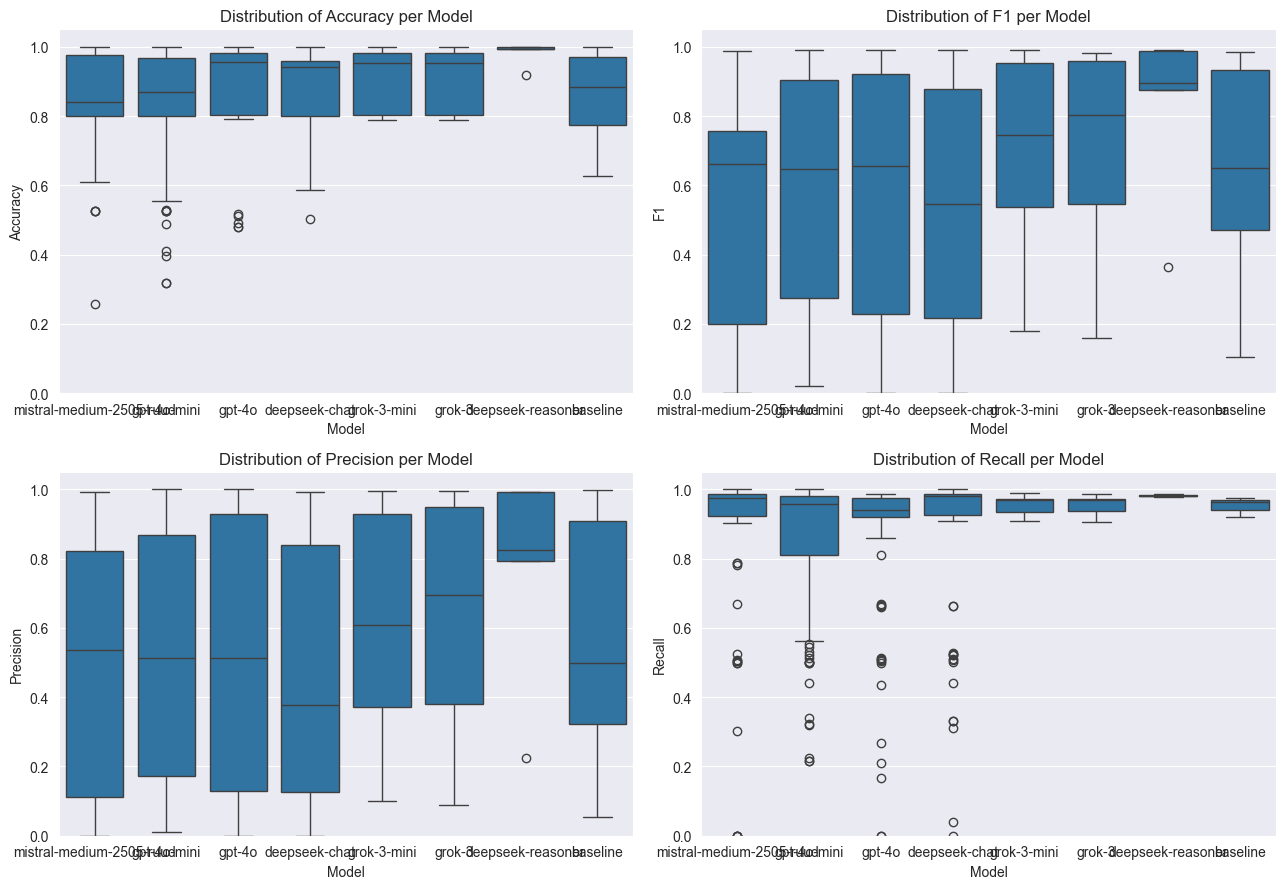

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['accuracy', 'f1', 'precision', 'recall']
fig, axes = plt.subplots(2, 2, figsize=(13, 9))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(data=runs_df, x='model', y=metric, ax=ax)
    ax.set_title(f'Distribution of {metric.capitalize()} per Model')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()
